In [1]:
# Import libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
# from google.colab import drive - If want to use.
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
#!pip install lime
import lime
import lime.lime_tabular

In [2]:
# Read data.
df=pd.read_csv('data/customer_data.csv')

In [3]:
df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# **Logistics Model**

In [4]:
# Logistics Regression function
def prepare_model_smote(df,class_col,cols_to_exclude):
# Use Synthetic Minority Oversampling Technique.
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

def run_model(X_train,X_test,y_train,y_test):
  from sklearn.linear_model import LogisticRegression
  from sklearn.metrics import roc_auc_score,classification_report
  global logreg # Defines logistic model as a global model that can be used outside of this function.
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train)
  ##Predicting y values
  global y_pred # Defines Y_Pred as a global variable that can be used outside of this function.
  y_pred = logreg.predict(X_test)
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%logit_roc_auc)


In [5]:
df = df.dropna() # cleaning up null values

In [6]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [7]:
# Run Logistic Regression model and evaluate results.
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.64      0.76       513
         1.0       0.18      0.65      0.29        63

    accuracy                           0.64       576
   macro avg       0.56      0.65      0.52       576
weighted avg       0.85      0.64      0.71       576

The area under the curve is: 0.65


# **Decision Tree Model**

In [8]:
# Define Class Imbalance function.
def prepare_model_smote(df,class_col,cols_to_exclude):
# Synthetic Minority Oversampling Technique.
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [9]:
# Decision Tree model function.
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global dectree # Define dectree decision model as a global model that can be used outside of this function.
  ##Fitting the decision tree
  dectree = DecisionTreeClassifier(random_state = 13,criterion = 'entropy')
  dectree.fit(X_train, y_train)
  ##Predicting y values
  global y_pred # Defines Y_Pred as a global variable that can be used outside of this function.
  y_pred = dectree.predict(X_test)
  dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%dectree_roc_auc)
  
  # All parameters of the decision tree classifier in scikit-learn can be found here:
  #     https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [10]:
# Prepare model.
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [11]:
# Run decision tree model. Check corresponding metrics.
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       513
         1.0       0.31      0.57      0.40        63

    accuracy                           0.81       576
   macro avg       0.62      0.71      0.64       576
weighted avg       0.87      0.81      0.84       576

The area under the curve is: 0.71


# **Random Forest Model**

In [12]:
# Define Class Imbalance function.
def prepare_model_smote(df,class_col,cols_to_exclude):
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [13]:
# Define Random Forest model.
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global randomforest
  ##Fitting the random forest
  randomforest = RandomForestClassifier(max_depth=5)
  randomforest.fit(X_train, y_train)
  # Predict y values.
  global y_pred
  y_pred = randomforest.predict(X_test)
  randomforest_roc_auc = roc_auc_score(y_test, randomforest.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%randomforest_roc_auc)

In [14]:
# Prepare model.
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [15]:
# Run Random Forest model. Evaluate corresponding metrics.
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91       513
         1.0       0.38      0.57      0.46        63

    accuracy                           0.85       576
   macro avg       0.66      0.73      0.68       576
weighted avg       0.88      0.85      0.86       576

The area under the curve is: 0.73


In [16]:
# List Probabilities for the target (0 and 1).
randomforest.predict_proba(X_test)

array([[0.24704736, 0.75295264],
       [0.82415197, 0.17584803],
       [0.14762939, 0.85237061],
       ...,
       [0.68151501, 0.31848499],
       [0.7896056 , 0.2103944 ],
       [0.71468482, 0.28531518]])

# **Ada Boost Model**

In [17]:
# Define Class Imbalance function.
def prepare_model_smote(df,class_col,cols_to_exclude):
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [18]:
# Define Adaboost model.
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global adaboost
  # Fit adaboost
  adaboost = AdaBoostClassifier(n_estimators = 100)
  adaboost.fit(X_train, y_train)
  # Predict y values.
  global y_pred
  y_pred = adaboost.predict(X_test)
  adaboost_roc_auc = roc_auc_score(y_test, adaboost.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%adaboost_roc_auc)

In [19]:
# Prepare model.
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [20]:
# Fit and Run Adaboost model. Evaluate corresponding metrics.
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.92       513
         1.0       0.39      0.60      0.47        63

    accuracy                           0.85       576
   macro avg       0.67      0.74      0.70       576
weighted avg       0.89      0.85      0.87       576

The area under the curve is: 0.74


In [21]:
# List probabilities for the target (0 and 1). 
adaboost.predict_proba(X_test)

array([[0.49799539, 0.50200461],
       [0.50886357, 0.49113643],
       [0.50326639, 0.49673361],
       ...,
       [0.50002002, 0.49997998],
       [0.50431091, 0.49568909],
       [0.50174862, 0.49825138]])

# **Gradient Boost Model**

In [22]:
# Define Class Imbalance funcntion.
def prepare_model_smote(df,class_col,cols_to_exclude):
  from sklearn.model_selection import train_test_split
  import numpy as np
  from imblearn.over_sampling import SMOTE
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [23]:
# Define Gradient Boost model.
def run_model(X_train,X_test,y_train,y_test):
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.metrics import roc_auc_score,classification_report
  global gradientboost 
  # Fit logistic regression.
  gradientboost = GradientBoostingClassifier()
  gradientboost.fit(X_train, y_train)
  # Predict y values.
  global y_pred
  y_pred = gradientboost.predict(X_test)
  gradientboost_roc_auc = roc_auc_score(y_test, gradientboost.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%gradientboost_roc_auc)

In [24]:
# Prepare model.
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [25]:
# Fit and run Gradient Boost model. Evaluate corresponding metrics.
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92       513
         1.0       0.42      0.57      0.48        63

    accuracy                           0.87       576
   macro avg       0.68      0.74      0.70       576
weighted avg       0.89      0.87      0.88       576

The area under the curve is: 0.74


In [26]:
# List probabilities for the target (0 and 1). 
gradientboost.predict_proba(X_test)

array([[0.31886631, 0.68113369],
       [0.93424483, 0.06575517],
       [0.19203722, 0.80796278],
       ...,
       [0.92187061, 0.07812939],
       [0.82559924, 0.17440076],
       [0.68969719, 0.31030281]])

# **Evaluating the Models**

In [27]:
# Define ROC curve plotting function.
def roc_curve (model,X_test,y_test):
  import matplotlib.pyplot as plt 
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import roc_curve
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
  # Set the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  # Plot the worst line possiple.
  plt.plot([0, 1], [0, 1],'b--')

  # Plot Logistic Regression.
  plt.plot(fpr, tpr, color='darkorange', label='Model (area = %0.2f)' % logit_roc_auc)

  # Adds labels, legend, etc.
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

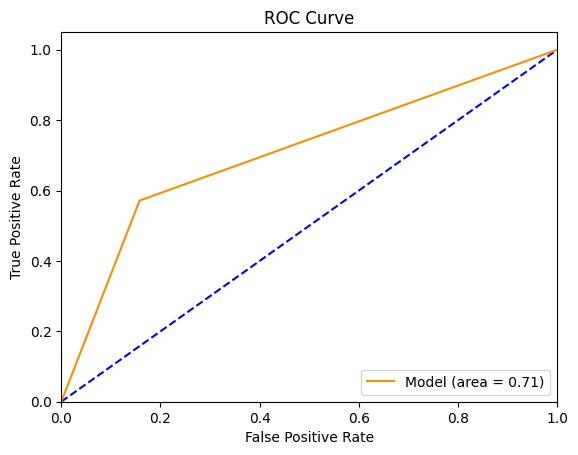

In [28]:
# ROC curve for Decision Tree model.
roc_curve (dectree,X_test,y_test)

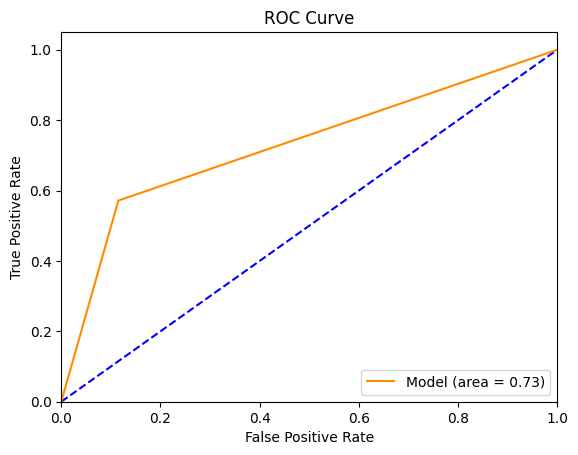

In [29]:
# ROC curve for Random Forest model.
roc_curve (randomforest,X_test,y_test)

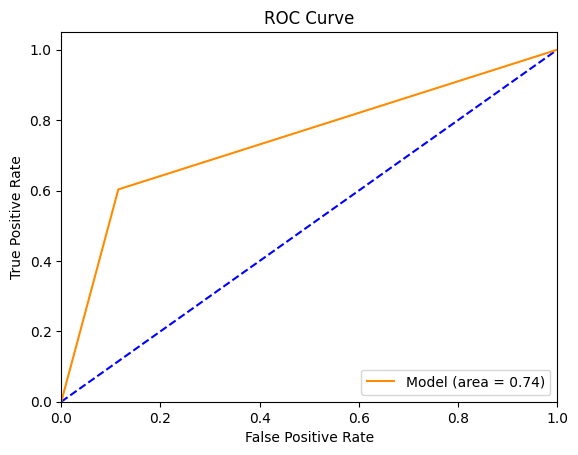

In [30]:
# ROC curve for Adaboost model.
roc_curve (adaboost,X_test,y_test)

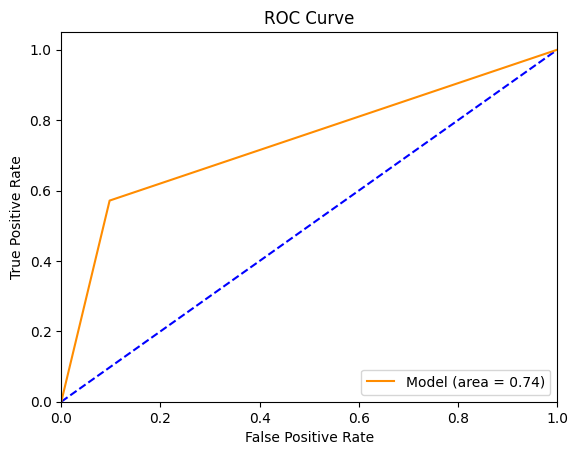

In [31]:
# ROC curve for Gradient Boost model.
roc_curve (gradientboost,X_test,y_test)

In [32]:
# Define function to plot feature importance.
def plot_feature_importances(model):
  feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
  feature_importances = feature_importances.sort_values(axis=0, ascending=False)
  fig, ax = plt.subplots()
  feature_importances.plot.bar()
  ax.set_title("Feature importances")
  fig.tight_layout()

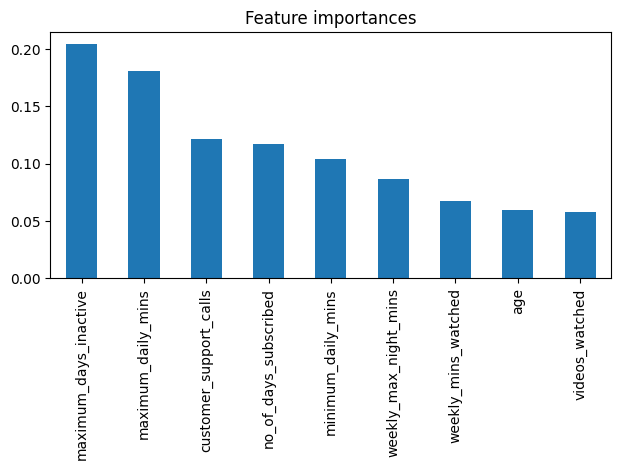

In [33]:
# Feature Importance for Decision Tree model.
plot_feature_importances(dectree)

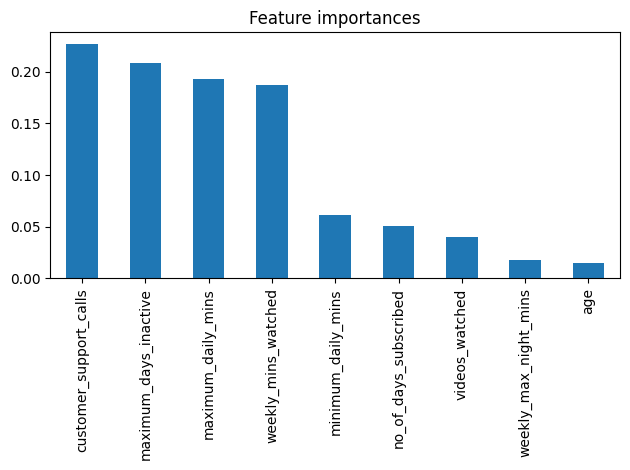

In [34]:
# Feature Importance for Random Forest model.
plot_feature_importances(randomforest)

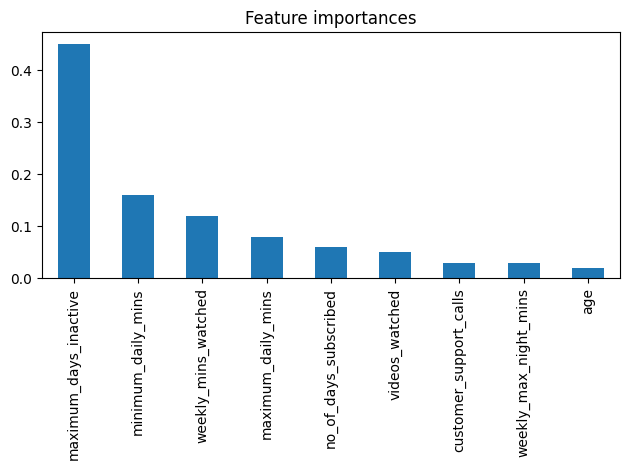

In [35]:
# Feature Importance for Adaboost model.
plot_feature_importances(adaboost)

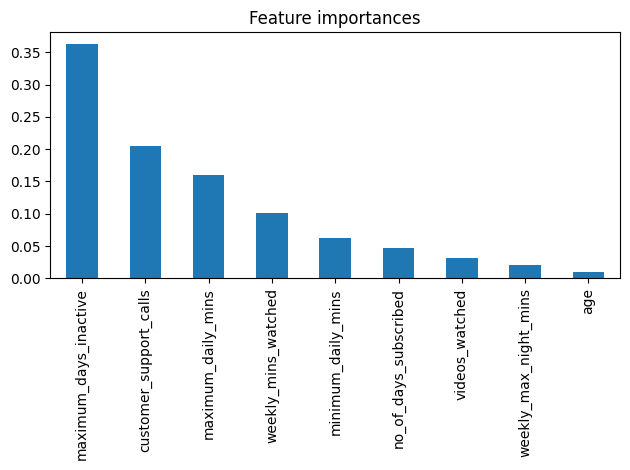

In [36]:
# Feature importance for Gradient Boost model.
plot_feature_importances(gradientboost)

# **LIME Implementation**

In [37]:
# Define LIME function - local Interpretable Model-agnostic Explanations
def lime_explanation(model,X_train,X_test,class_names,chosen_index):
  import lime
  import lime.lime_tabular
  explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names = X_train.columns,class_names=class_names,kernel_width=5)
  choosen_instance = X_test.loc[[chosen_index]].values[0]
  exp = explainer.explain_instance(choosen_instance, lambda x: model.predict_proba(x).astype(float),num_features=10)
  exp.show_in_notebook(show_all=False)

In [38]:
# Implement LIME function.
lime_explanation(gradientboost,X_train,X_test,['Not Churn','Churn'],1)

In [39]:
# Define LIME list function.
def lime_explanation_list(model,X_train,X_test,class_names,chosen_index):
  import lime
  import lime.lime_tabular
  explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names = X_train.columns,class_names=class_names,kernel_width=5)
  choosen_instance = X_test.loc[[chosen_index]].values[0]
  exp = explainer.explain_instance(choosen_instance, lambda x: model.predict_proba(x).astype(float),num_features=10)
  return exp.as_list()

In [40]:
# LIME Implementation results as a list.
lime_explanation_list(gradientboost,X_train,X_test,['Not Churn','Churn'],1)

[('maximum_days_inactive <= 3.00', -0.09628942258829763),
 ('videos_watched <= 3.00', 0.057518737803328245),
 ('31.37 < maximum_daily_mins <= 39.39', -0.04101172517235928),
 ('minimum_daily_mins <= 8.68', -0.03947552319139773),
 ('no_of_days_subscribed > 123.00', -0.03211593947489814),
 ('276.75 < weekly_mins_watched <= 347.59', -0.022671620008081917),
 ('1.00 < customer_support_calls <= 3.00', -0.014487925646769557),
 ('weekly_max_night_mins <= 87.00', -0.011423863039294102),
 ('37.00 < age <= 43.00', 0.0010331679531090162)]